# Prediction Loss and Model Performance
Here I showed a counter-intuitive plot between prediction loss and model performance, where the model has higher loss when the model has a better performance?

Method:
The setup of this experiment is that I used a simple Neural Network model to fit the train data. The train data is generated with a simple linear function with noise: y = m * x + torch.randn(N, 1) / 2. Here I vary the slope, m, and for every value m, I generate the train data with that linear function. Then the neural network model fits the data and outputs two values, model loss (mean square error MSE), and model performance (Pearson correlation coefficient between y_prediction and y_actual). I then plot the model loss vs slope m, as well as the model performance vs slope m, resulting the plot below.

Interpretation:
1. The plot by no means indicate that higher loss means better model performance. In fact, each slope value in the plot is one experiment, and the loss between different slopes is not comparable. The reason is that the value of loss is not scaled. The value of loss is influenced by the magnitude of y. The reason why loss decreases around slope = 0 is because the magnitude of y is smaller since y = m * x + torch.randn(N, 1) / 2. A higher loss does not necessarily mean worse performance when comparing different sets of experiments

2. The correlation is reasonably good when slope is away from 0, but low when slope = 0. This is because when slope is approaching 0, x is less informative about y since y is more influenced by the random variation. When using x as the predictor, the model has less useful information about y so it cannot make a good prediction. The neural network model can only learn the relationships across the given variables. This is also true for a lot of other ML models


Alex Chen

In [1]:
# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
# display.set_matplotlib_formats('svg')

In [3]:
def create_data(m:float, N:int) -> tuple:
    '''returns a tuple of (x, y), x is pytorch tensor of N by 1 by normal distribution, 
    y is pytorch tensor of the same dimension which is a linear transformation of x'''
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2
    return x, y

In [4]:
def build_train_model(x: torch.TensorType, y: torch.Tensor) -> tuple:
    '''does 1d regression with neural network in pytorch
    x and y are N by 1 pytorch tensors'''
    # build the model
    ANNreg = nn.Sequential(
        nn.Linear(1,1), 
        nn.ReLU(),
        nn.Linear(1,1)
    )
    # set up the training 
    learningRate = 0.05
    loss_function = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)
    num_epoch = 500
    loss_all_epochs = torch.zeros(num_epoch)
    # start the training
    for epoch in range(num_epoch):
        # forward pass
        y_hat = ANNreg(x)
        # calculate loss
        loss = loss_function(y_hat, y)
        loss_all_epochs[epoch] = loss
        # backpropogate to adjust weight
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # get the pearson corelation coefficient
    corr = np.corrcoef(y_hat.detach().numpy().T, y.numpy().T)[0, 1]
    return float(loss.detach().numpy()), corr
    

/Users/alexchen/miniconda3/envs/pytorch/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexchen/miniconda3/envs/pytorch/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 0, 'slope of linear function')

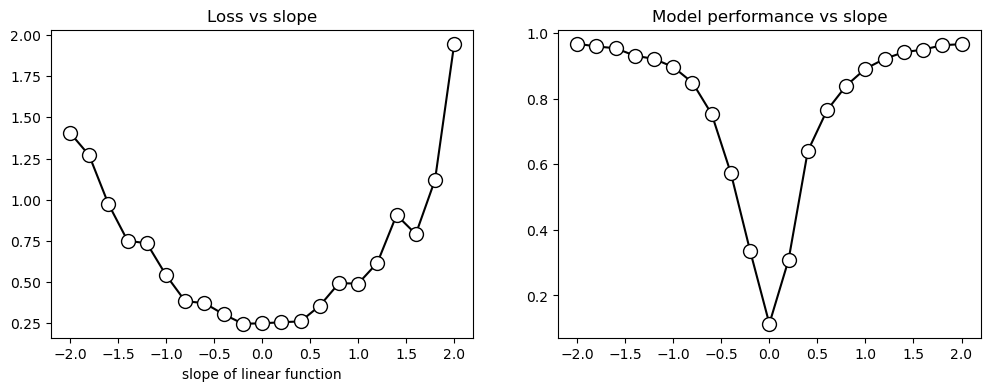

In [5]:
m_array = np.linspace(-2, 2, 21)
N = 50

# repeat 50 repetitions
reps = 50
loss_array = np.zeros([reps,21])
correlation_array = np.zeros([reps, 21])
for rep in range(reps):
    for i, m in enumerate(m_array):
        x, y = create_data(m, N)
        loss, correlation = build_train_model(x, y)
        loss_array[rep, i] = loss
        correlation_array[rep, i] = correlation

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].set_title('Loss vs slope')
ax[0].set_xlabel('slope of linear function')
ax[0].plot(m_array, loss_array.mean(axis=0), 'ko-', markerfacecolor='w', markersize=10)

ax[1].set_title('Model performance vs slope')
ax[1].plot(m_array, np.nanmean(correlation_array, axis=0), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('slope of linear function')
